# CmpE462
## Project Phase 1
### 25.03.2022
#### Alper Canberk Balcı - Sabri Gökberk Yılmaz

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from PIL import Image
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math

In [34]:
# Question 2

pics = [] # array to stack flattened images initially
for i in range(10000):
    #-----------------------------------------#
    # Q2.A 
    image = Image.open("3dshapes_train/"+str(i)+".jpg").convert('L') # reading image and applying grayscale conversion
    image = np.array(image).flatten() # image flattened
    #-----------------------------------------#
    pics.append(image) 
trainx = np.array(pics) # converting list to np array
trainy = np.load("./orientations_train.npy", mmap_mode="r") # reading labels

# below is reading of test set applying same procedures with train set
pics_test = []
for i in range(1000):
    image = Image.open("3dshapes_test/"+str(i)+".jpg").convert('L')
    image = np.array(image).flatten()
    pics_test.append(image)
testx = np.array(pics_test)
testy = np.load("./orientations_test.npy", mmap_mode="r")

In [14]:
# Feature reduction
pca = PCA(n_components=0.95) # construction of PCA object that preserves at least 90% of variance
pca.fit(trainx) # adjusting pca instance by train data
trainx_reduced = pca.transform(trainx) # applying pca on train data
testx_reduced = pca.transform(testx) # applying pca on test data

print("Size of new features after PCA: ", trainx_reduced.shape[1])
print("Used technique: PCA, implemented by scikit-learn.")

Size of new features after PCA:  8
Used technique: PCA, implemented by scikit-learn.


In [15]:
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=900)
tsne_results = tsne.fit_transform(trainx_reduced)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.036s...
[t-SNE] Computed neighbors for 10000 samples in 0.930s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 69.845956
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.462612
[t-SNE] KL divergence after 900 iterations: 0.683755


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

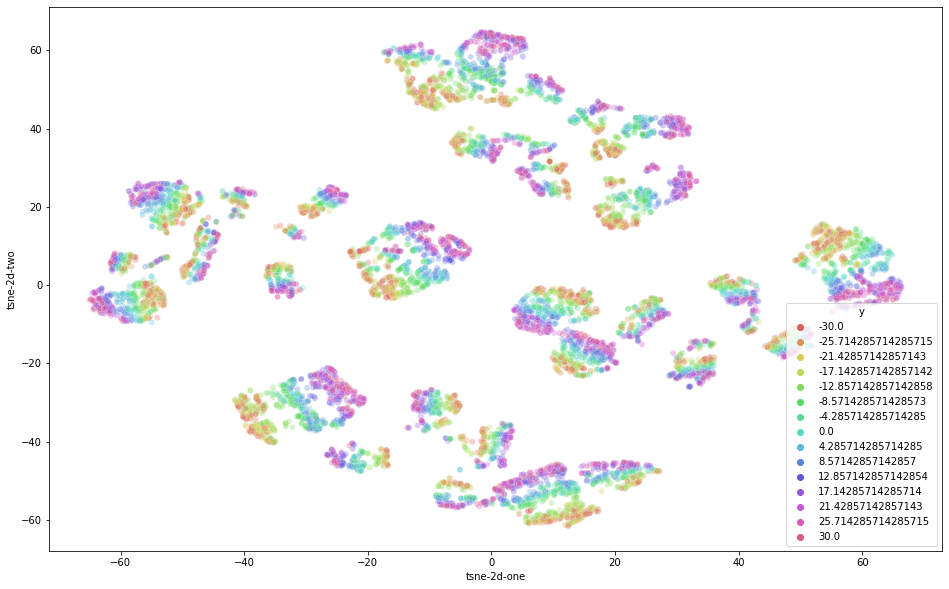

In [16]:
df_subset = {}
df_subset['y'] = trainy
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue = "y",
    palette=sns.color_palette("hls", 15),
    data=df_subset,
    legend="full",
    alpha=0.3
)

Discriminability of your features: Very poor. They don't look like linearly seperable.

### Question 1.B
#### Method

We use **softmax regression a.k.a. multinomial logistic regression** and we use **Cross Entropy Loss** function to change our weight values in the gradient descent operation.  

#### Derivativation of Gradient of Loss
Moving towards negative direction of Gradient of the loss function, **L**, is the process of minimizing the loss during training 
##### Steps of derivation:  

We are going to compute the Jacobian matrix of the softmax function. Using the obtained Jacobian matrix, we will then compute the gradient of the categorical cross-entropy loss.  

##### Jacobian of the Softmax Function
When talking about the derivative of the softmax function, we actually talk about its Jacobian matrix, which is the matrix of all first-order partial derivatives:
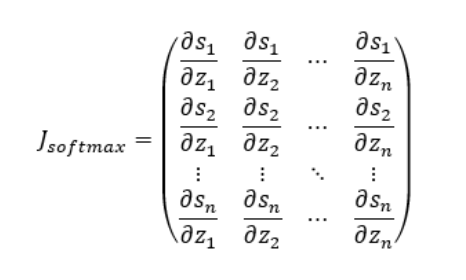  

where

$s_i = \frac{e^{z_i}}{\displaystyle\sum_{l=1} ^{15} e^{z_l}} $  

Since the outputs of the softmax function are strictly positive values, we can make the following derivation super short, by applying the following trick: instead of taking the partial derivative of the output, we take the partial derivative of the log of the output (also called “logarithmic derivative”):  

$\frac{\partial}{\partial z_j} \log(s_i) = \frac{1}{s_i} \frac{\partial s_i}{\partial z_j}$  

$\frac{\partial s_i}{\partial z_j} = s_i . \frac{\partial}{\partial z_j} \log(s_i)$  

The left-hand side is exactly the partial derivative we’re looking for. As we will shortly see, the right-hand side simplifies the computation of the derivative, such that we don’t require the quotient rule of derivatives. We must first take the logarithm of 𝑠:  

$\log(s_i) = \log(\frac{e^{z_i}}{\sum_{l=1} ^{15} e^{z_l}}) = z_i - \log(\displaystyle\sum_{l=1} ^{15} e^{z_l}) $  

$\frac{\partial}{\partial z_j} \log(s_i) = \frac{\partial z_i}{\partial z_j} - \frac{\partial}{\partial z_j}\log(\displaystyle\sum_{l=1} ^{15} e^{z_l})$  

$\frac{\partial z_i}{\partial z_j} = \begin{cases} 
      1 & , i = j \\
      0 & , otherwise 
   \end{cases}$  

Which can be concisely written using the indicator function 1{·}. The indicator function takes on a value of 1 if its argument is true, and 0 otherwise.  

The second term on the right-hand side can be evaluated by applying the chain rule:  

$\frac{\partial}{\partial z_j} \log(s_i) = 1\{i = j\} - \frac{1}{\sum_{l=1} ^{15} e^{z_l}} . (\frac{\partial}{\partial z_j} \displaystyle\sum_{l=1} ^{15} e^{z_l})$  

In the step above we used the derivative of the natural logarithm and chain rule, that is, d/dx*ln(f(x)) = f'(x)/f(x).  

Obtaining the partial derivative of the sum is trivial:  

$ \frac{\partial}{\partial z_j} \displaystyle\sum_{l=1} ^{15} e^{z_l} = \frac{\partial}{\partial z_j} [e^{z_1} + e^{z_2} + ... + e^{z_j} + ... + e^{z_n}] = \frac{\partial}{\partial z_j} [e^{z_j}] = e^{z_j} $  

Plugging the result into the formula yields:  

$\frac{\partial}{\partial z_j} \log(s_i) = 1\{i = j\} - \frac{e^{z_j}}{\sum_{l=1} ^{15} e^{z_l}} = 1\{i = j\} - s_j $  

Finally, we have to multiply the upper expression with 𝑠, as shown at the beginning of this section:  

$\frac{\partial s_i}{\partial z_j} = s_i . \frac{\partial}{\partial z_j}\log(s_i) = s_i . (1\{i = j\} - s_j) $  

This concludes our derivation. We’ve obtained a formula for all the elements of the Jacobi matrix (both diagonal and off-diagonal).  


##### Cross Entropy 

$Z = W.X$, where **W** contains the bias term and **X** has an element whose value is **1** corresponding to the bias.  

$\frac{\partial L}{\partial W} = \frac{\partial L}{\partial Z} \frac{\partial Z}{\partial W}$  

$\frac{\partial Z}{\partial W} = X$ , so, we will multiply with X at the end.  

$L(y,s) = - \displaystyle\sum_{i=1} ^{15} y_i . \log(s_i) $, where **y** is the one-hot-encoded ground truth values vector, and **s** is the probabilities (generated by softmax) vector.  

$\frac{\partial L}{\partial z_j} = - \frac{\partial}{\partial z_j} \displaystyle\sum_{i=1} ^{15} y_i . \log(s_i) = - \displaystyle\sum_{i=1} ^{15} y_i . \frac{\partial}{\partial z_j} \log(s_i) = - \displaystyle\sum_{i=1} ^{15} \frac{y_i}{s_i}. \frac{\partial s_i}{\partial z_j} $  

Let us plug in the derivatives we have obtained in the **Jacobian of the Softmax Function** section:  

$\frac{\partial L}{\partial z_j} = - \displaystyle\sum_{i=1} ^{15} \frac{y_i}{s_i}. s_i . (1\{i = j\} - s_j) = - \displaystyle\sum_{i=1} ^{15} y_i . (1\{i = j\} - s_j)$  

and expand the product in the last term:  

$\frac{\partial L}{\partial z_j} = \displaystyle\sum_{i=1} ^{15} y_i. s_j . \displaystyle\sum_{i=1} ^{15} y_i. 1\{i = j\}$  

As we remember, the indicator function 1{·} takes on a value of 1 for i = j and 0 everywhere else:  

$\frac{\partial L}{\partial z_j} = \displaystyle\sum_{i=1} ^{15} y_i. s_j - y_j$  

Next, we pull 𝑠 out of the sum, since it does not depend on index i:  

$\frac{\partial L}{\partial z_j} = s_j . \displaystyle\sum_{i=1} ^{15} y_i - y_j = s_j - y_j$  

In the last step we used the fact, that the one-hot encoded vector 𝒚 sums to 1. Remember that a one-hot encoded vector can be interpreted as a probability distribution with the probability mass centered around a single value. In the concise vector notation we get:  

$\frac{\partial L}{\partial z} = s - y$  

Then, we multiply this with **X**:  
So, the gradient of the loss function with respect to model vector, $\nabla E(w) = (s-y).X$ 

In [44]:
def softmax2(W, X):
    scores = np.empty((X.shape[0], W.shape[0]))  # a matrix of size (number of data rows) * (number of classes)
    for i in range(X.shape[0]):
        z = W.dot(X[i].reshape(-1, 1))
        exp_z = (np.exp(z)).flatten()
        scores[i] = exp_z/np.sum(exp_z)
    return scores


In [45]:
def cross_entropy_loss(probabilities, gt):
    n = probabilities.shape[0]
    loss = 0
    est = 0
    for row, label in zip(probabilities, gt):
        if row[np.argmax(label)] < 10**-10:
            est = 10**-10
        else:
            est = row[np.argmax(label)]
        loss -= np.log(est)
    loss /= n
    return loss

In [46]:
def read_data():

    pics = []  # array to stack flattened images initially
    for i in range(10000):
        image = Image.open("3dshapes_train/" + str(i) + ".jpg").convert(
            'L')  # reading image and applying grayscale conversion
        image = np.array(image).flatten()  # image flattened
        # -----------------------------------------#
        pics.append(image)
    trainx = np.array(pics).astype("float64")  # converting list to np array
    trainy = np.load("./orientations_train.npy", mmap_mode="r")  # reading labels

    label_map = {-30:0, -26:1, -22:2, -18:3, -13:4, -9:5, -5:6, 0:7, 4:8, 8:9, 12:10, 17:11, 21:12, 25:13, 30:14}
    trainy_one_hot = np.zeros((trainx.shape[0], 15))
    for i in range(len(trainy)):
        trainy_one_hot[i][label_map[math.floor(trainy[i])]] = 1
    # below is reading of test set applying same procedures with train set
    pics_test = []
    for i in range(1000):
        image = Image.open("3dshapes_test/" + str(i) + ".jpg").convert('L')
        image = np.array(image).flatten()
        pics_test.append(image)
    testx = np.array(pics_test).astype("float64")
    testy = np.load("./orientations_test.npy", mmap_mode="r")
    testy_one_hot = np.zeros((trainx.shape[0], 15))
    for i in range(len(testy)):
        testy_one_hot[i][label_map[math.floor(testy[i])]] = 1
    return trainx, trainy_one_hot, testx, testy_one_hot



In [98]:
def gradient_descent2(trainxx, trainyy, l=0.0005, max_iter=1000):
    b = np.full((trainxx.shape[0], 1), 1)
    X = np.column_stack([trainxx, b])  # np.array(([0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]))
    gt = trainyy
    W = np.random.rand(gt.shape[1], X.shape[1])  # np.array(([2, 1, 1], [1, 1, 1]))
    X = X.astype('float64')
    W = W.astype('float64')
        
    estimates = ""
    probabilities = ""
    ce_loss = 1000
    iter = 0
    while ce_loss > 0.01 and iter < max_iter:
        iter += 1
        probabilities = softmax2(W, X)
        estimates = [np.argmax(i) for i in probabilities]  # estimated labels
        gradient_loss = (probabilities - gt).T.dot(X)
        step = l * gradient_loss
        W -= step  # stepping towards negative direction of the gradient
        ce_loss = cross_entropy_loss(probabilities, gt)
    
    return ce_loss, estimates, W


In [116]:
trainx, trainy, testx, testy = read_data()
pca = PCA(n_components=0.99) # construction of PCA object that preserves at least 90% of variance
pca.fit(trainx) # adjusting pca instance by train data
trainx_reduced = pca.transform(trainx) # applying pca on train data
testx_reduced = pca.transform(testx) # applying pca on test data
trainx_reduced /= np.max(trainx_reduced)
testx_reduced /= np.max(testx_reduced)
print("Size of new features after PCA: ", trainx_reduced.shape[1])
print("Used technique: PCA, implemented by scikit-learn.")


Size of new features after PCA:  67
Used technique: PCA, implemented by scikit-learn.


In [83]:
'''
partitions_validationx = [trainx_reduced[0:2000], trainx_reduced[2000:4000], trainx_reduced[4000:6000], trainx_reduced[6000:8000], trainx_reduced[8000:10000]]
partitions_trainx = [trainx_reduced[2000:10000], trainx_reduced[0:2000].append(trainx_reduced[4000:10000]),
                    trainx_reduced[0:4000].append(trainx_reduced[6000:10000]), trainx_reduced[0:6000].append(trainx_reduced[8000:10000]),
                    trainy[0:8000]]
partitions_validationy = [trainy[0:2000], trainy[2000:4000], trainy[4000:6000], trainy[6000:8000], trainy[8000:10000]]
partitions_trainy = [trainy[2000:10000], trainy[0:2000].append(trainy[4000:10000]),
                    trainy[0:4000].append(trainy[6000:10000]), trainy[0:6000].append(trainy[8000:10000]),
                    trainy[0:8000]]
'''

partitions_validationx = [trainx_reduced[0:2000], trainx_reduced[2000:4000], trainx_reduced[4000:6000], trainx_reduced[6000:8000], trainx_reduced[8000:10000]]
partitions_trainx = [trainx_reduced[2000:10000], np.append(trainx_reduced[0:2000], trainx_reduced[4000:10000], axis=0), np.append(trainx_reduced[0:4000], trainx_reduced[6000:10000], axis=0), np.append(trainx_reduced[0:6000],trainx_reduced[8000:10000], axis=0),trainx_reduced[0:8000]]

partitions_validationy = [trainy[0:2000], trainy[2000:4000], trainy[4000:6000], trainy[6000:8000], trainy[8000:10000]]
partitions_trainy = [trainy[2000:10000], np.append(trainy[0:2000], trainy[4000:10000], axis=0), np.append(trainy[0:4000], trainy[6000:10000], axis=0), np.append(trainy[0:6000],trainy[8000:10000], axis=0),trainy[0:8000]]
                  

eta_for_partitions = [0.0001, 0.0005, 0.001, 0.005, 0.01]

min_loss = 10000000
min_eta = 1000
for k in range(5):  # k represents the 5-fold cross validation step k
    eta = eta_for_partitions[k]
    trainx_ = partitions_trainx[k]
    testx_ = partitions_validationx[k]
    
    trainy_ = partitions_trainy[k]
    testy_ = partitions_validationy[k]
    print(trainy_.shape)
    loss,_,_ = gradient_descent2(trainx_, trainy_, l=eta)
    
    print("kth fold:", k, " eta: ", eta, "loss: ", loss)
    if loss < min_loss:
        min_loss = loss
        min_eta = eta
        
#gradient_descent2(trainx_reduced, trainy)

#  gradient_descent()

(8000, 15)
kth fold: 0  eta:  0.0001 loss:  2.0226592890840056
(8000, 15)
kth fold: 1  eta:  0.0005 loss:  1.317186674580533
(8000, 15)
kth fold: 2  eta:  0.001 loss:  1.0719112080904298
(8000, 15)
kth fold: 3  eta:  0.005 loss:  0.9964666602783191
(8000, 15)
kth fold: 4  eta:  0.01 loss:  1.810869760868317


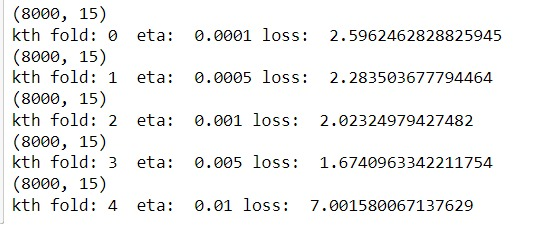

In [117]:
loss, est, W = gradient_descent2(trainx_reduced, trainy, l=min_eta, max_iter = 1000)


In [85]:
trainy_new = np.load("./orientations_train.npy", mmap_mode="r")  # reading labels
testy_new = np.load("./orientations_test.npy", mmap_mode="r")

In [118]:
label_map = {-30:0, -26:1, -22:2, -18:3, -13:4, -9:5, -5:6, 0:7, 4:8, 8:9, 12:10, 17:11, 21:12, 25:13, 30:14}
trainy_trans = np.zeros(10000)
for i in range(len(trainy_new)):
    trainy_trans[i] = label_map[math.floor(trainy_new[i])]

arraydump = est - trainy_trans
count = 0
for i in range(len(arraydump)):
    if arraydump[i] < 10**-6:
        count+=1

print("train acc:" , count/10000)


train acc: 0.964


In [101]:
min_eta

0.005

In [111]:
testy_trans = np.zeros(1000)
for i in range(len(testy_new)):
    testy_trans[i] = label_map[math.floor(testy_new[i])]

In [119]:
def predict(testxx, testyy, W):
    b = np.full((testxx.shape[0], 1), 1)
    X = np.column_stack([testxx, b])
    probabilities = softmax2(W, X)
    estimates = [np.argmax(i) for i in probabilities]  # estimated labels
    return estimates

In [120]:
#test acc
est = predict(testx_reduced, testy, W)

In [121]:
arraydump = est - testy_trans
count = 0
for i in range(len(arraydump)):
    if arraydump[i] < 10**-6:
        count+=1

print("test acc:" , count/1000)


test acc: 0.956


**Question 1.D**    
train acc: 0.964  
test acc: 0.956  
**Question 1.E**   
Overfitting: there is not.  
**Question 1.F**  
with %95 variance in PCA, we had results:  
train acc: 0.819  
test acc: 0.791  
We increased the variance to %99 in PCA  
train acc: 0.964  
test acc: 0.956  
So, underfitting issue did stem from the lack of features, and it is solved.  

In [125]:
#Question 1.G
# If values of a column in the W matrix is relatively higher than the others, 
# we can suggest that the corresponding feature has more effect to the estimation.
print(np.mean(W, axis = 0))

# output:
''' [0.4177317  0.498779   0.52911547 0.42291701 0.47203301 0.53276727
 0.55530684 0.30738142 0.45627076 0.47734366 0.4127174  0.47074792
 0.47182621 0.56282947 0.48372787 0.31555581 0.43382738 0.44931264
 0.45934081 0.46061408 0.55610612 0.4833511  0.48456104 0.47428793
 0.52693136 0.49292288 0.59684051 0.40388639 0.45274719 0.5152935
 0.44777101 0.48746773 0.59414735 0.38574866 0.5077439  0.43278225
 0.5856201  0.62335526 0.4771584  0.50834851 0.49735887 0.45720735
 0.34567249 0.44785608 0.38694473 0.58312103 0.5808368  0.51237516
 0.47721787 0.47725718 0.48722263 0.53040849 0.6707177  0.35809119
 0.59195126 0.48153396 0.41362447 0.49196536 0.49543206 0.53530999
 0.40446334 0.49093904 0.48171041 0.39419802 0.47993006 0.52118793
 0.55062589 0.60234807]
 '''
# It seems that there isn't a relatively large value among the features, that is, they are close. 
# However, bigger values represent more importance/variance.
# 16 features represent %95 variance in the data, 67 features represent %99 variance in the data.
# So additional 51 features doesn't yield much variance.
# However accuracy increases significantly when additional features are used as well.
# All in all, interpreting the contributions seems to be complicated here.

[0.4177317  0.498779   0.52911547 0.42291701 0.47203301 0.53276727
 0.55530684 0.30738142 0.45627076 0.47734366 0.4127174  0.47074792
 0.47182621 0.56282947 0.48372787 0.31555581 0.43382738 0.44931264
 0.45934081 0.46061408 0.55610612 0.4833511  0.48456104 0.47428793
 0.52693136 0.49292288 0.59684051 0.40388639 0.45274719 0.5152935
 0.44777101 0.48746773 0.59414735 0.38574866 0.5077439  0.43278225
 0.5856201  0.62335526 0.4771584  0.50834851 0.49735887 0.45720735
 0.34567249 0.44785608 0.38694473 0.58312103 0.5808368  0.51237516
 0.47721787 0.47725718 0.48722263 0.53040849 0.6707177  0.35809119
 0.59195126 0.48153396 0.41362447 0.49196536 0.49543206 0.53530999
 0.40446334 0.49093904 0.48171041 0.39419802 0.47993006 0.52118793
 0.55062589 0.60234807]


In [32]:
#Question 2 Naive Bayes:

from sklearn.naive_bayes import GaussianNB

In [126]:
# Question 2.a
# transformation of labels to fit into GaussianNB

trainy_new = np.load("./orientations_train.npy", mmap_mode="r")  # reading labels
testy_new = np.load("./orientations_test.npy", mmap_mode="r")

label_map = {-30:0, -26:1, -22:2, -18:3, -13:4, -9:5, -5:6, 0:7, 4:8, 8:9, 12:10, 17:11, 21:12, 25:13, 30:14}
trainy_trans = np.zeros(10000)
for i in range(len(trainy_new)):
    trainy_trans[i] = label_map[math.floor(trainy_new[i])]

In [127]:
testy_trans = np.zeros(1000)
for i in range(len(testy_new)):
    testy_trans[i] = label_map[math.floor(testy_new[i])]

In [128]:
clf = GaussianNB()


clf.fit(trainx_reduced, trainy_trans)


GaussianNB()

In [129]:
clf.score(trainx_reduced, trainy_trans)

0.9756

In [130]:
clf.score(testx_reduced, testy_trans)

0.977

**Question 2.B** ) As our test score and train score are high, our naive assumption that the features are conditionally independent holds.  

**Question 2.C** ) with and without respectively : 15*4096(256-1), 15(256^4096-1), but 4096 is reduced here. We have it 67 with %99 variance in PCA instead of 4096. Without the assumption, there is a meteoric rise in the number of parameters.


#### References:
* https://numpy.org/
* https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6
* https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
* https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
* https://www.geeksforgeeks.org/how-to-inverse-a-matrix-using-numpy/#:~:text=Inverse%20of%20a%20Matrix%20using,the%20inverse%20of%20a%20matrix.https://www.geeksforgeeks.org/how-to-inverse-a-matrix-using-numpy/#:~:text=Inverse%20of%20a%20Matrix%20using,the%20inverse%20of%20a%20matrix.
* https://pillow.readthedocs.io/en/stable/
* https://machinelearningmastery.com/k-fold-cross-validation/
* https://stats.stackexchange.com/questions/33136/how-to-define-the-termination-condition-for-gradient-descent
* https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1
* https://towardsdatascience.com/ml-from-scratch-multinomial-logistic-regression-6dda9cbacf9d
* https://www.kaggle.com/code/vitorgamalemos/multinomial-logistic-regression-from-scratch/notebook
* 

